# ASA Flight Data

The 2009 ASA Statistical Computing and Graphics Data Expo consisted of flight arrival and departure
details for all commercial flights on major carriers within the USA, from October 1987 to April 2008.
This is a large dataset; there are nearly 120 million records in total, and takes up 1.6 gigabytes of space
compressed and 12 gigabytes when uncompressed. The complete dataset along with supplementary
information and variable descriptions can be downloaded from the Harvard Dataverse at:

https://doi.org/10.7910/DVN/HG7NV7

Choose any subset of (at least two) consecutive years and any of the supplementary information provided
by the Harvard Dataverse to answer the following questions:

1. When is the best time of day, day of the week, and time of year to fly to minimise delays?
2. How does the number of people flying between different locations change over time?
3. Can you detect cascading failures as delays in one airport create delays in others?
4. Use the available variables to construct a model that predicts delays.

All questions should be answered using Python for all tasks.

Deliverables:
• Provide a short written answer to each question clearly describing the methodology employed in
your code. You can do this either as scripts or notebooks, clearly indicating with comments (or
filename if multiple scripts/notebooks) which question it is addressing. Any databases you set
up, data wrangling/cleaning operations you carry out, and any modelling decisions you make
should be clearly described.
• You should also supply the code you used to answer each question, in a way that can be used by
someone else to replicate your analyses. Reminder that the code should be in Python for all tasks.

## Extract Data

Convert bz2 file type to csv by using BreeZip

I used 1989 (my birth year) and 1990 data

In [34]:
import csv
import pandas as pd
import seaborn as sns

In [8]:
df_1989 =pd.read_csv('1989.csv')
df_1990=pd.read_csv('1990.csv')

Check that the extracted files are Pandas dataframes

In [9]:
print(type(df_1989))

<class 'pandas.core.frame.DataFrame'>


In [10]:
df_1989.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1989,1,23,1,1419.0,1230,1742.0,1552,UA,183,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1989,1,24,2,1255.0,1230,1612.0,1552,UA,183,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1989,1,25,3,1230.0,1230,1533.0,1552,UA,183,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1989,1,26,4,1230.0,1230,1523.0,1552,UA,183,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1989,1,27,5,1232.0,1230,1513.0,1552,UA,183,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Check the dimensions of each dataframe

In [15]:
df_1989.shape

(5041200, 29)

In [13]:
df_1990.shape

(5270893, 29)

We can see that each dataframe has the same number of columns

In [16]:
df_1989.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [17]:
df_1990.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

Both dataframes also have the same column labels

Join both dataframes on top of each other

In [20]:
df_join = pd.concat([df_1989,df_1990])

In [21]:
df_join.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1989,1,23,1,1419.0,1230,1742.0,1552,UA,183,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1989,1,24,2,1255.0,1230,1612.0,1552,UA,183,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1989,1,25,3,1230.0,1230,1533.0,1552,UA,183,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1989,1,26,4,1230.0,1230,1523.0,1552,UA,183,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1989,1,27,5,1232.0,1230,1513.0,1552,UA,183,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [22]:
df_join.shape

(10312093, 29)

## 1. When is the best time of day, day of the week, and time of year to fly to minimise delays?

I would plot three charts
1. Average Delays against Time of Day
2. Average Delays against day of week
3. Average Delays against time of year

But first we need a data dictionary to see what the column labels mean

In [32]:
data_dict =pd.read_csv('variable-descriptions.csv')

In [33]:
data_dict.drop(['Variable descriptions'],axis=1, inplace=True)
data_dict.columns=data_dict.iloc[1]
data_dict

1,Name,Description
0,NaN,NaN
1,Name,Description
2,Year,1987-2008
3,Month,12-Jan
4,DayofMonth,31-Jan
5,DayOfWeek,1 (Monday) - 7 (Sunday)
6,DepTime,"actual departure time (local, hhmm)"
7,CRSDepTime,"scheduled departure time (local, hhmm)"
8,ArrTime,"actual arrival time (local, hhmm)"
9,CRSArrTime,"scheduled arrival time (local, hhmm)"


I will do the first plot, and see if Time of Day affects departure delay, so the columns I care about are
1. CRSDepTime
2. DepDelay

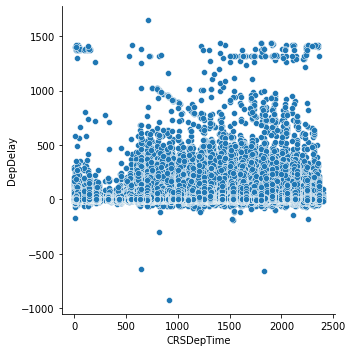

In [35]:
sns.relplot(data=df_join, x="CRSDepTime", y="DepDelay")

I believe you can see when there is the least delay in flight time based on the scatter plot. Try the rest yourself!

You should now plot 

2. Average Delays against day of week
3. Average Delays against time of year

## 2. How does the number of people flying between different locations change over time?

I cant seem to find any data related to the number of people flying. Let me know if you found something.

# 3. Can you detect cascading failures as delays in one airport create delays in others?

Hint

1. Use the columns Origin and Dest
2. Check the FlightNum to make sure it matches
3. It would make sense that FlightNums would repeat themselves because there are departure and arrival destinations for every flight

# 4. Use the available variables to construct a model that predicts delays.

Hint
1. Use sklearn library to import LinearRegression
2. Determine which variables are categorical and which are numerical
3. For categorical variables you will need to create dummies (https://www.geeksforgeeks.org/how-to-create-dummy-variables-in-python-with-pandas/)
4. For numerical variables you will need to normalise them (https://www.digitalocean.com/community/tutorials/normalize-data-in-python)
5. After you do all these, remove the NaN values
6. Then perform multilinear regression with DepDelay as the response variable (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

You may refer to an example where I performed linear regression to predict house prices (https://github.com/joel-quek/General-Assembly-DSI/blob/main/Projects/Project%202/joel_project_2%20Final.ipynb)